### 1. Get the numerical variables from our dataset.

In [178]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import scipy.stats as stats


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [179]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [180]:
data.shape

(9134, 24)

In [181]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [182]:
data.columns = [data.columns[col_name].lower().replace(' ','_') for col_name in range(len(data.columns))]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [183]:
data = data.set_index('customer')
data = data.round(2)
data.head(1)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize


In [184]:
data.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [185]:
numericals = data.select_dtypes(np.number).round(2)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.52,56274,69,32,5,0,1,384.81
QZ44356,6979.54,0,94,13,42,0,8,1131.46
AI49188,12887.43,48767,108,18,38,0,2,566.47
WW63253,7645.86,0,106,18,65,0,7,529.88
HB64268,2813.69,43836,73,12,44,0,1,138.13


In [186]:
data['customer_lifetime_value'].unique

<bound method Series.unique of customer
BU79786     2763.52
QZ44356     6979.54
AI49188    12887.43
WW63253     7645.86
HB64268     2813.69
             ...   
LA72316    23405.99
PK87824     3096.51
TD14365     8163.89
UP19263     7524.44
Y167826     2611.84
Name: customer_lifetime_value, Length: 9134, dtype: float64>

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

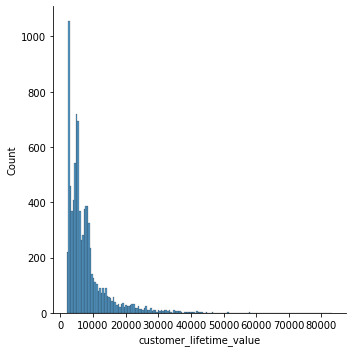

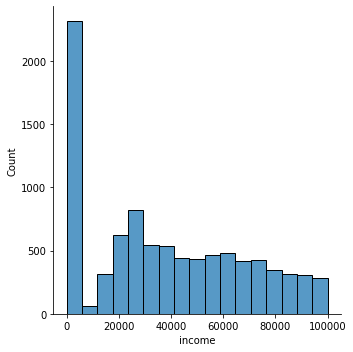

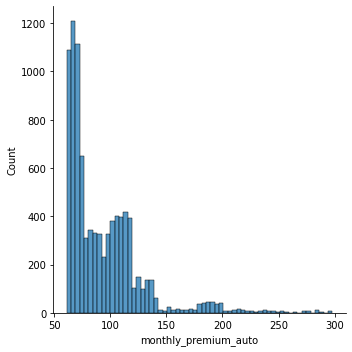

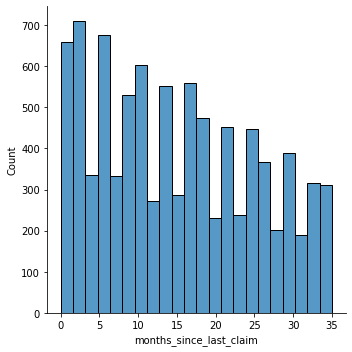

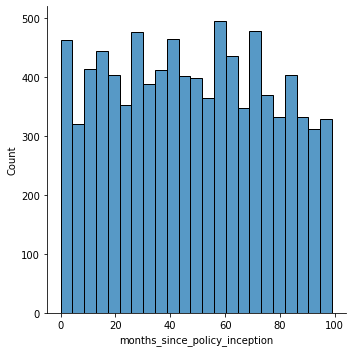

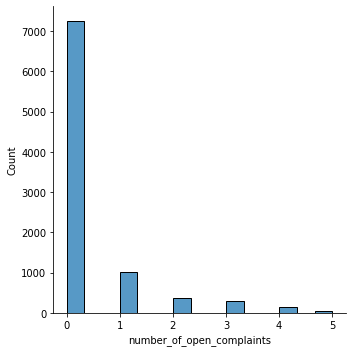

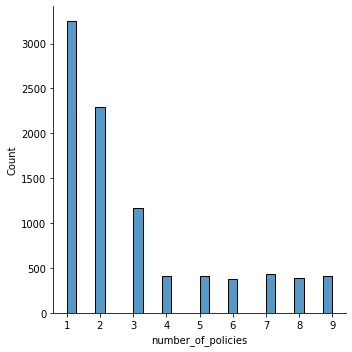

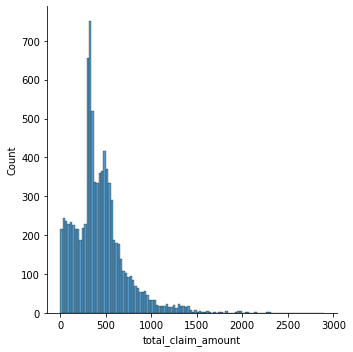

In [187]:
for col in numericals:
    sns.displot(data[col])
    plt.show() #Most of them have an exponential distribution

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

1. Normalizer
2. Standarized
3. Box-Cox
4. MinMax Scaler
5. Log-transform

##### 1. Normalizer

In [188]:
nor = Normalizer()

numericals_nor = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=nor.transform(numericals), # use scaler to put all numerical values between 0 (X_train min) and 1 (X_train max)
    index=numericals.index, columns=numericals.columns) # set index and column names of the new dataframe
numericals_nor

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
QZ44356,0.987007,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
AI49188,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
WW63253,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
HB64268,0.064054,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
LA72316,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
PK87824,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
TD14365,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406


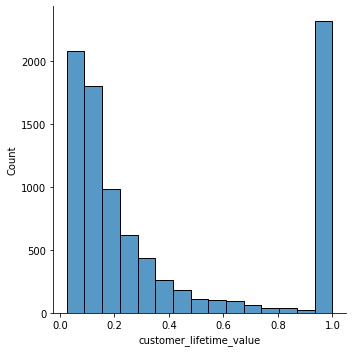

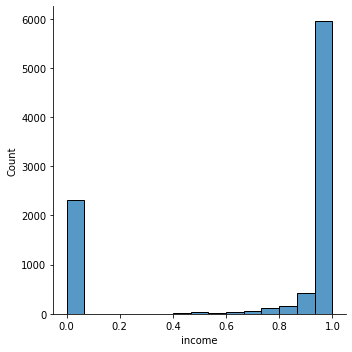

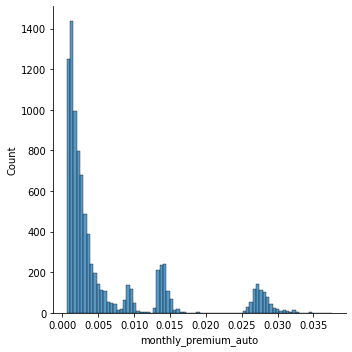

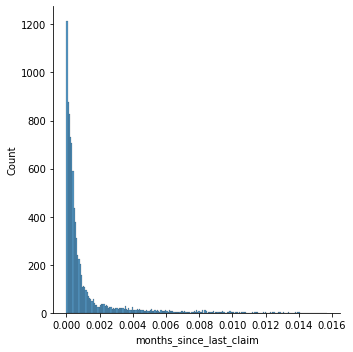

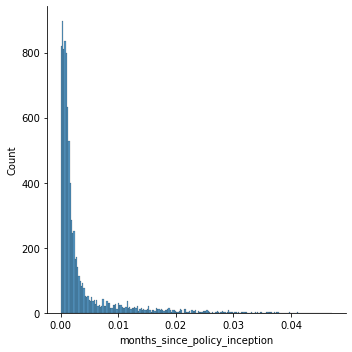

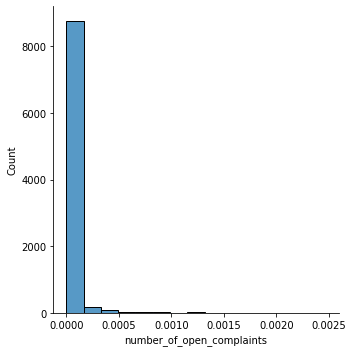

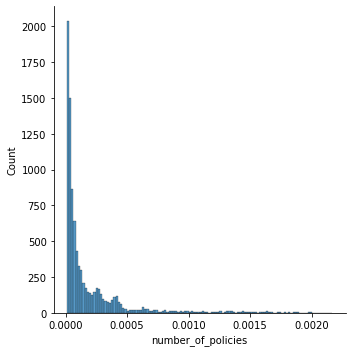

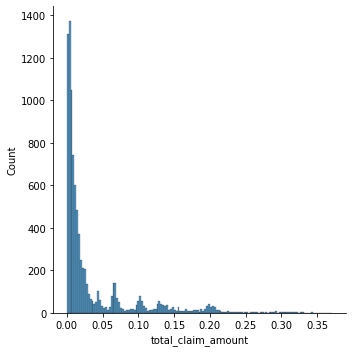

In [189]:
for col in numericals_nor:
    sns.displot(numericals_nor[col])
    plt.show

##### 2. StandarScaler

In [190]:
standard = StandardScaler().fit(numericals)

numericals_stand = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=standard.transform(numericals), # use scaler to put all numerical values between 0 (X_train min) and 1 (X_train max)
    index=numericals.index, columns=numericals.columns) # set index and column names of the new dataframe
numericals_stand.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169644
QZ44356,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400720
AI49188,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455726
WW63253,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329764
HB64268,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018847


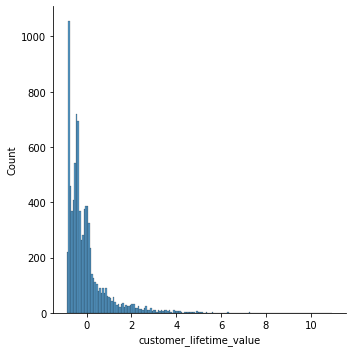

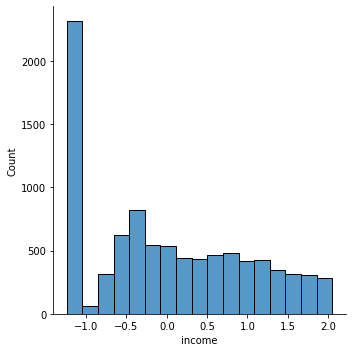

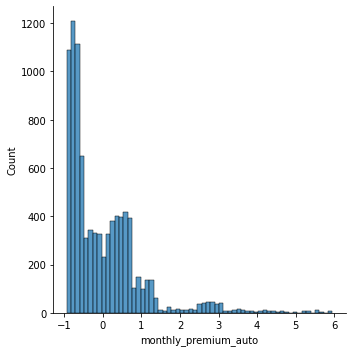

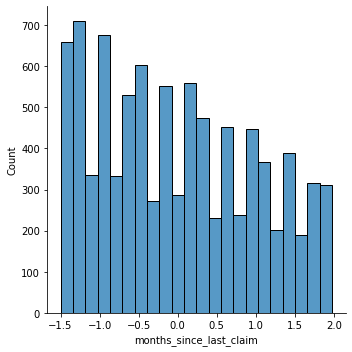

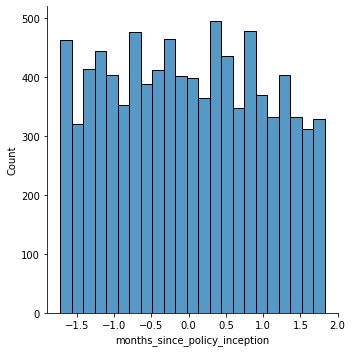

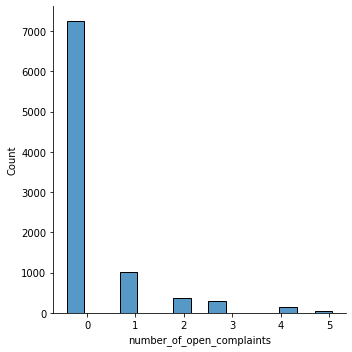

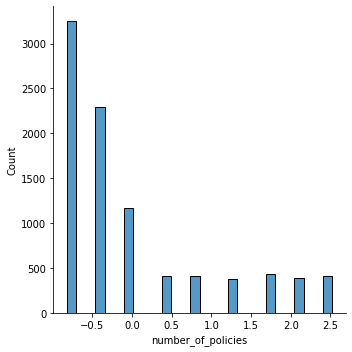

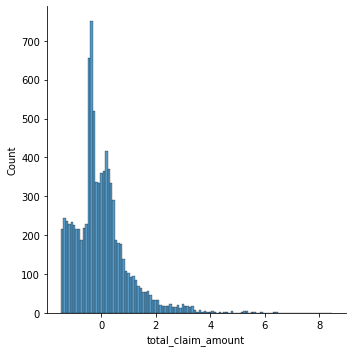

In [191]:
for col in numericals_stand:
    sns.displot(numericals_stand[col])
    plt.show

##### 3. Box-Cox

In [194]:
def boxcox_transform(numericals):
    numeric_cols = numericals.columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in data
        numericals[column] = np.where(numericals[column]<=0, np.NAN, numericals[column]) 
        numericals[column] = numericals[column].fillna(numericals[column].mean())
        transformed_data, ci = stats.boxcox(numericals[column])
        numericals[column] = transformed_data
        _ci[column] = [ci] 
    return numericals, _ci

numericals_box, _ci = boxcox_transform(numericals.copy()) #IMPORTANT: use copy method
numericals_box.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035801
QZ44356,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357700
AI49188,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071840
WW63253,2.759124,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763326
HB64268,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560136


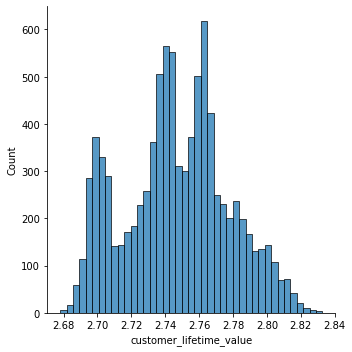

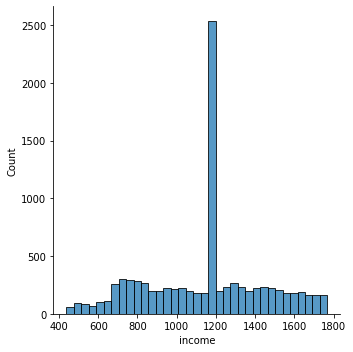

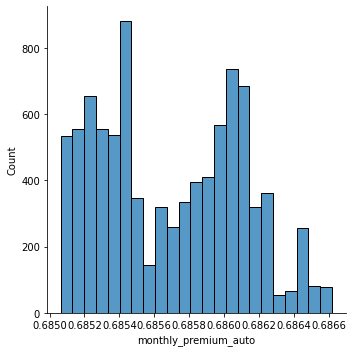

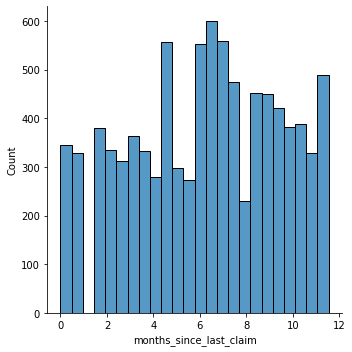

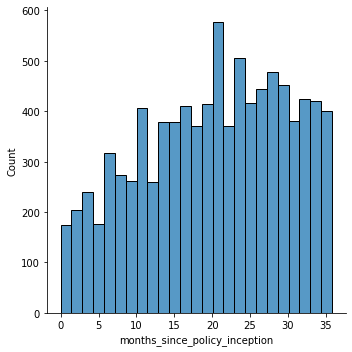

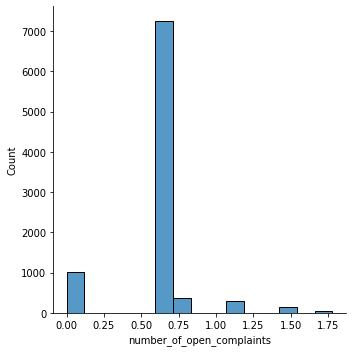

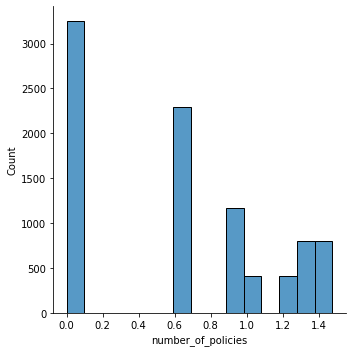

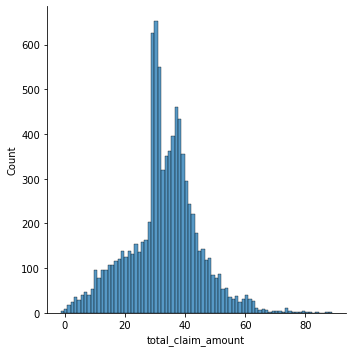

In [195]:
for col in numericals_box:
    sns.displot(numericals_box[col])
    plt.show

##### 4. MinMax Scaler

In [197]:
min_max = MinMaxScaler().fit(numericals)

numericals_min_max = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=min_max.transform(numericals), # use scaler to put all numerical values between 0 (X_train min) and 1 (X_train max)
    index=numericals.index, columns=numericals.columns) # set index and column names of the new dataframe
numericals_min_max.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132973
QZ44356,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391049
AI49188,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195763
WW63253,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183116
HB64268,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047709


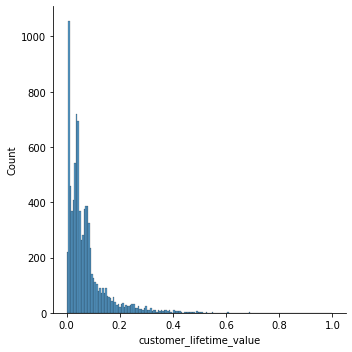

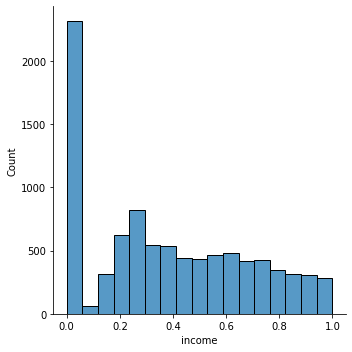

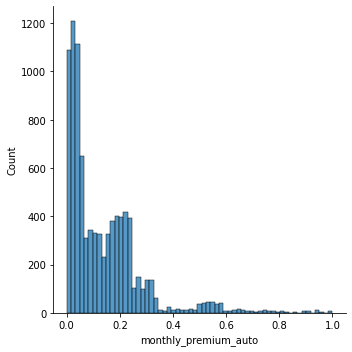

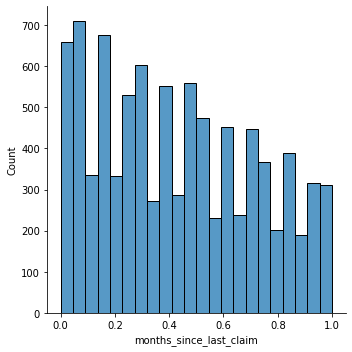

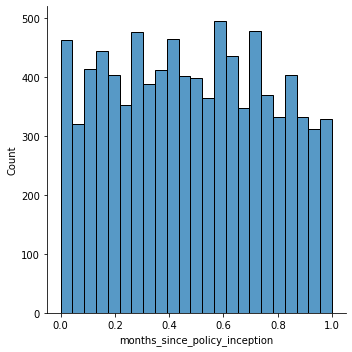

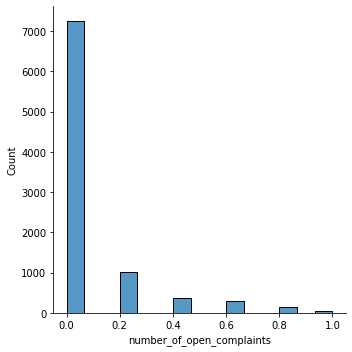

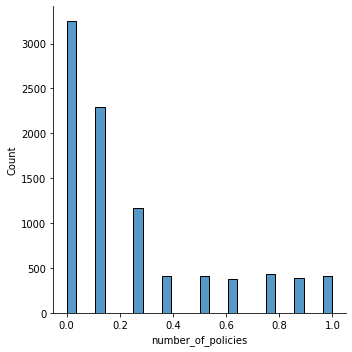

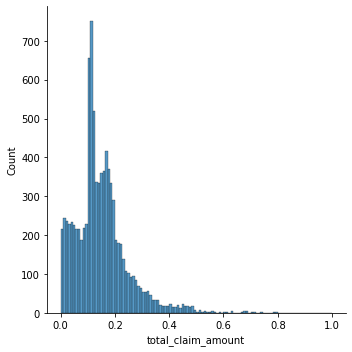

In [198]:
for col in numericals_min_max:
    sns.displot(numericals_min_max[col])
    plt.show